In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
torch.manual_seed(1)   

### 1. 构造数据集 

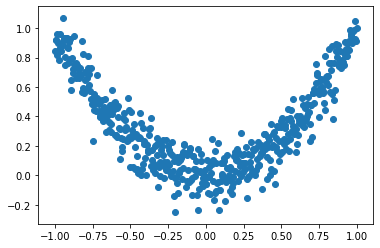

In [2]:
# 构造数据集
x = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)
y = x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))
plt.scatter(x.numpy(), y.numpy())
plt.show()

# data loader
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, 
                         batch_size=32, 
                         shuffle=True, 
                         num_workers=2)

### 2. 构建多个模型并添加不同的优化器 

In [3]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)  
        self.predict = torch.nn.Linear(20, 1)   
 
    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)            
        return x

In [17]:
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [ ]:
torch.optim.SGD
torch.optim.SGD
torch.optim.RMSprop
torch.optim.Adam

### 3. 训练带不同优化器的网络

In [18]:
learning_rate = 0.1
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=learning_rate)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=learning_rate, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=learning_rate, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=learning_rate, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]
 
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # 记录 training 时不同神经网络的 loss

In [21]:
for epoch in range(10):
    print('Epoch:', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)  
        b_y = Variable(batch_y)
 
        # 优化4个优化器
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)            
            loss = loss_func(output, b_y)
            opt.zero_grad()              
            loss.backward()               
            opt.step()                    
            l_his.append(loss.item())    

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


### 4. 可视化 

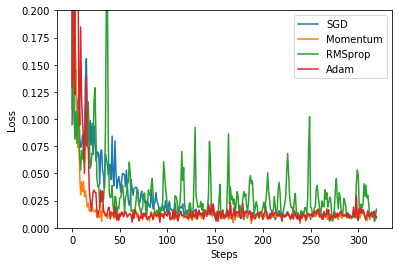

In [23]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

In [26]:
plt.savefig('optim.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>